In [1]:
import numpy as np
from mindspore import context
from mindspore import nn
from mindspore.train import Model
from mindspore.train.callback import LossMonitor
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
from util.mindspore_model import LeNetProMindspore
from util.mindspore_func import get_data
from mindspore.ops import operations as P

In [2]:
context.set_context(mode=context.GRAPH_MODE, device_target='CPU')
net = LeNetProMindspore()
optimizer = nn.Adam(net.trainable_params(), learning_rate=0.01)
criterion = nn.loss.CrossEntropyLoss()
model = Model(net, loss_fn=criterion, optimizer=optimizer, metrics={'acc'})

In [3]:
train_dataset, val_dataset = get_data(batch_size=128)

[WARNING] ME(5944:23456,MainProcess):2023-05-05-19:03:08.265.623 [mindspore\dataset\engine\datasets.py:1117] Dataset is shuffled before split.


In [4]:
lossMonitor = LossMonitor(100)
num_epoch = 200
epoch_losses, train_scores, val_scores = [], [], []
for epoch in tqdm(range(num_epoch)):
    model.train(1, train_dataset, callbacks=[lossMonitor], dataset_sink_mode=False)
    train_score = model.eval(train_dataset)
    train_scores.append(train_score['acc'])
    val_score = model.eval(val_dataset)
    val_scores.append(val_score['acc'])
    epoch_losses.append(np.mean(lossMonitor.losses))

100%|██████████| 200/200 [01:58<00:00,  1.69it/s]


In [5]:
resultData = pd.DataFrame({'epoch_loss': epoch_losses, 'train_score': train_scores, 'test_score': val_scores})
resultData.to_csv(f'./results/{type(net).__name__}-result.csv', index=False)

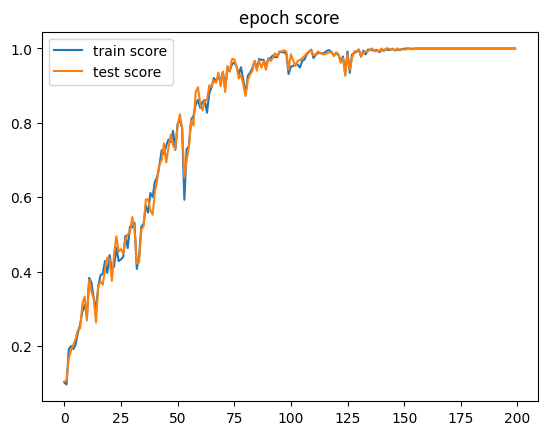

In [6]:
# 训练精度
plt.plot(train_scores, label='train score')
plt.plot(val_scores, label='test score')
plt.title('epoch score')
plt.legend()
plt.savefig(f'./results/{type(net).__name__}-epoch_score.png')
plt.show()

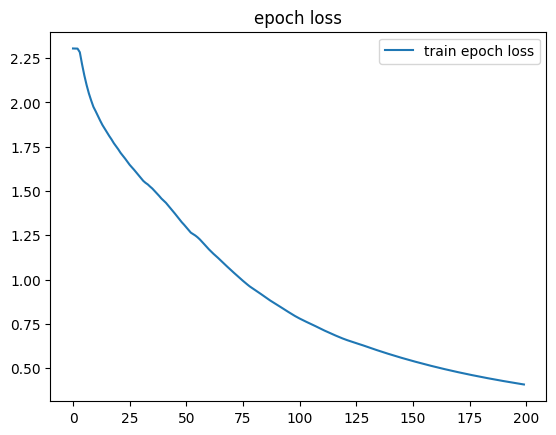

In [7]:
# 训练损失
plt.plot(epoch_losses)
plt.title('epoch loss')
plt.legend(['train epoch loss'])
plt.savefig(f'./results/{type(net).__name__}-epoch_loss.png')
plt.show()